In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a lsit 
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1e040c50794df567ba5c178b7dd45ffe


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


    

    

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
  
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping..." + city.title())
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | nuuk
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | robertsport
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | geraldton
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | te anau
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | saleaula
City not found. Skipping...Saleaula
Processing Record 14 of Set 1 | ostrovnoy
Processing Record 15 of Set 1 | sur
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | hofn
Processing Record 18 of Set 1 | touros
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | port-gentil
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | mahebourg
Processing Record 23 of Set 1 | cape town
Processing Record 

Processing Record 38 of Set 4 | brigham city
Processing Record 39 of Set 4 | san vicente
Processing Record 40 of Set 4 | titay
Processing Record 41 of Set 4 | tabiauea
City not found. Skipping...Tabiauea
Processing Record 42 of Set 4 | cassia
Processing Record 43 of Set 4 | illoqqortoormiut
City not found. Skipping...Illoqqortoormiut
Processing Record 44 of Set 4 | santa rosa
Processing Record 45 of Set 4 | maku
Processing Record 46 of Set 4 | port lincoln
Processing Record 47 of Set 4 | jibuti
Processing Record 48 of Set 4 | kaeo
Processing Record 49 of Set 4 | hilo
Processing Record 50 of Set 4 | nakusp
Processing Record 1 of Set 5 | borovoy
Processing Record 2 of Set 5 | kalabo
Processing Record 3 of Set 5 | kaifeng
Processing Record 4 of Set 5 | carman
Processing Record 5 of Set 5 | hereford
Processing Record 6 of Set 5 | kokorevka
Processing Record 7 of Set 5 | jardim
Processing Record 8 of Set 5 | gamba
Processing Record 9 of Set 5 | shihezi
Processing Record 10 of Set 5 | pisco


Processing Record 27 of Set 8 | coruripe
Processing Record 28 of Set 8 | surany
Processing Record 29 of Set 8 | louisbourg
City not found. Skipping...Louisbourg
Processing Record 30 of Set 8 | chifeng
Processing Record 31 of Set 8 | jujuy
City not found. Skipping...Jujuy
Processing Record 32 of Set 8 | tiarei
Processing Record 33 of Set 8 | tilichiki
Processing Record 34 of Set 8 | abu dhabi
Processing Record 35 of Set 8 | phibun mangsahan
Processing Record 36 of Set 8 | hastings
Processing Record 37 of Set 8 | mangan
Processing Record 38 of Set 8 | skjervoy
Processing Record 39 of Set 8 | lasa
Processing Record 40 of Set 8 | qaqortoq
Processing Record 41 of Set 8 | kudat
Processing Record 42 of Set 8 | malwan
City not found. Skipping...Malwan
Processing Record 43 of Set 8 | waitati
Processing Record 44 of Set 8 | ketchikan
Processing Record 45 of Set 8 | sentyabrskiy
City not found. Skipping...Sentyabrskiy
Processing Record 46 of Set 8 | iralaya
Processing Record 47 of Set 8 | svetlay

Processing Record 13 of Set 12 | kamenka
Processing Record 14 of Set 12 | wanning
Processing Record 15 of Set 12 | kormilovka
Processing Record 16 of Set 12 | kuche
City not found. Skipping...Kuche
Processing Record 17 of Set 12 | manzhouli
Processing Record 18 of Set 12 | rivera
Processing Record 19 of Set 12 | sechura
Processing Record 20 of Set 12 | foumbot
Processing Record 21 of Set 12 | santa
Processing Record 22 of Set 12 | chimbote
Processing Record 23 of Set 12 | umzimvubu
City not found. Skipping...Umzimvubu
Processing Record 24 of Set 12 | opuwo
Processing Record 25 of Set 12 | marina
Processing Record 26 of Set 12 | samarai
Processing Record 27 of Set 12 | halden
Processing Record 28 of Set 12 | camacari
Processing Record 29 of Set 12 | lockhart
Processing Record 30 of Set 12 | juneau
Processing Record 31 of Set 12 | elizabethtown
Processing Record 32 of Set 12 | bonthe
Processing Record 33 of Set 12 | belen
Processing Record 34 of Set 12 | basavakalyan
Processing Record 35

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,66.25,88,75,19.57,CK,2021-08-13 02:13:45
1,New Norfolk,-42.7826,147.0587,56.71,65,91,5.01,AU,2021-08-13 02:09:18
2,Nuuk,64.1835,-51.7216,52.41,66,75,12.66,GL,2021-08-13 02:15:14
3,San Patricio,28.0170,-97.5169,85.91,67,57,11.90,US,2021-08-13 02:14:20
4,Robertsport,6.7533,-11.3686,77.04,88,100,13.40,LR,2021-08-13 02:17:45
5,Chuy,-33.6971,-53.4616,43.56,87,0,5.14,UY,2021-08-13 02:13:48
6,Albany,42.6001,-73.9662,75.31,93,82,10.38,US,2021-08-13 02:12:38
7,Geraldton,-28.7667,114.6000,54.01,71,0,16.11,AU,2021-08-13 02:14:16
8,Ilulissat,69.2167,-51.1000,48.22,57,20,6.91,GL,2021-08-13 02:14:13
9,Te Anau,-45.4167,167.7167,48.69,77,52,3.83,NZ,2021-08-13 02:14:59


In [13]:
new_column_order = ["column2", "column4", "column1"]


In [15]:
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.sort_values(by=['Wind Speed'])

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
154,Neuquen,AR,2021-08-13 02:18:11,-38.9516,-68.0591,48.09,71,0,0.00
268,Cortez,US,2021-08-13 02:18:37,37.3489,-108.5859,77.76,35,1,0.00
372,Kernersville,US,2021-08-13 02:19:03,36.1199,-80.0736,77.25,74,40,0.00
494,Santa Luzia,BR,2021-08-13 02:19:35,-19.7697,-43.8514,65.30,67,0,0.00
443,Abha,SA,2021-08-13 02:19:22,18.2164,42.5053,64.22,72,0,0.00
...,...,...,...,...,...,...,...,...,...
108,Tual,ID,2021-08-13 02:18:02,-5.6667,132.7500,80.49,82,24,21.16
54,Kahului,US,2021-08-13 02:14:39,20.8947,-156.4700,85.26,69,1,21.85
211,Bandarbeyla,SO,2021-08-13 02:16:27,9.4942,50.8122,74.82,86,71,22.75
52,Punta Arenas,CL,2021-08-13 02:13:43,-53.1500,-70.9167,45.97,81,94,24.87


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

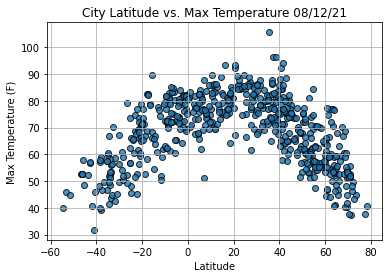

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

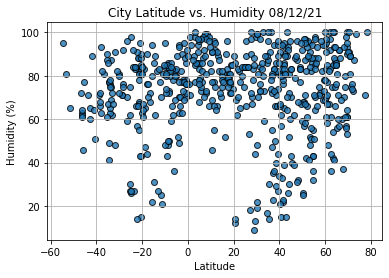

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

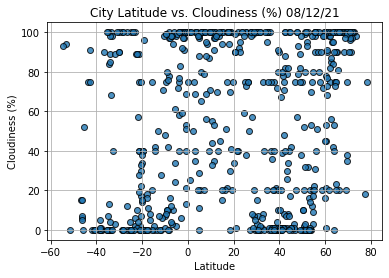

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

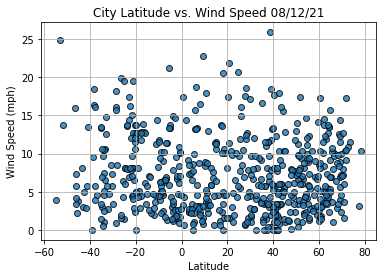

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()